In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.lines import Line2D
import sys
sys.path.insert(0, '..')

plt.style.use('default')

In [6]:
group = ['stroke', 'intact']
tinfo = pd.read_csv('../data/baseline/tinfo.tsv', sep='\t')
log_training = pd.DataFrame()
mapping = ['on', 'off']
for gr in group:
    for map in mapping:
        for sn in tinfo.subj_id.unique():
            log = pd.read_csv(f'../data/controller_training/log_training.{map}-manifold.{gr}.{sn}.tsv', sep='\t')
            log_ds = log[::10]
            log_training = pd.concat([log_training, log_ds])

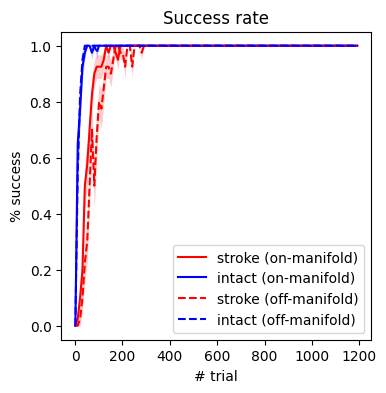

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
metric = 'success'
sb.lineplot(ax=ax, data=log_training[onm], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Success rate')
ax.set_ylabel('% success')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

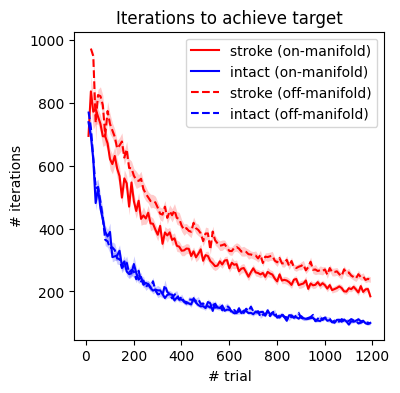

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'nsteps'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Iterations to achieve target')
ax.set_ylabel('# iterations')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

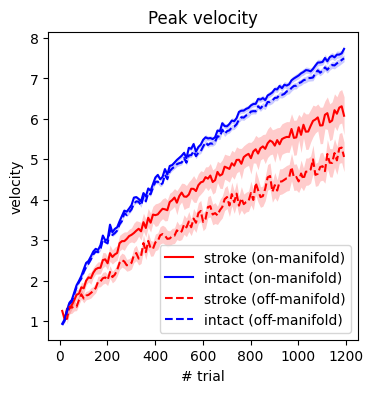

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

onm = log_training.mapping == 'on'
success = log_training.success == True
metric = 'velMax'
sb.lineplot(ax=ax, data=log_training[onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], err_kws={'lw': 0})
sb.lineplot(ax=ax, data=log_training[~onm & success], x='TN', y=metric, hue='group', errorbar='se', palette=['red', 'blue'], ls='--', err_kws={'lw': 0})
ax.set_title('Peak velocity')
ax.set_ylabel('velocity')
ax.set_xlabel('# trial')
clines = [Line2D([0], [0], color='red',),
    Line2D([0], [0], color='blue',),
    Line2D([0], [0], color='red', ls='--'),
    Line2D([0], [0], color='blue', ls='--')]
ax.legend(clines, ['stroke (on-manifold)', 'intact (on-manifold)', 'stroke (off-manifold)', 'intact (off-manifold)'])

plt.show()

In [21]:
from training import simulate_trial, calc_manifold

ds = 'stroke'
sn = 100
d = 5
F = np.load(f'../data/baseline/single_finger.pretraining.{ds}.{sn}.npy')
A = np.load(f'../data/basis_vectors/basis_vectors.{ds}.{sn}.npy')
W_dec = np.load(f'../data/controller_training/W_dec.{ds}.{sn}.npy')
W_pol = np.load(f'../data/controller_training/W_pol.on-manifold.{ds}.{sn}.npy')
Nc, K = A.shape
F_c = F.reshape(-1, Nc)
B_on, B_off = calc_manifold(F_c, d)

In [ ]:
rng = np.random.
ang = .25 * np.pi
radius = 1
pos_star = radius * np.array([np.cos(ang), np.sin(ang)])
maxT = 2000
dt = .01
u = np.zeros((K,), dtype=float)
pos = np.zeros((2,), dtype=float)
P = W_dec @ B_on.T
for t in range(maxT):
    # map u -> force
    f = A @ u  # (N,)

    # decode velocity and update position
    vel = P @ f
    pos = pos + dt * vel

    # calculate error
    e = pos_star - pos

    u = W_pol @ e + .1 * rng.standard_normal(K)